In [1]:
# Import necessary libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

In [2]:
def compute_h (coordinates):
    ''' This function will compute the homography matrix
        Input: A list of 4 lists following this format [x, y, x', y']
        where x and y are pixel from destination image
        and x' and y' are the pixel from source image
        Output: A homograply 3x3 matrix'''

        # Create Ax=b where x is the solution
    A = np.zeros((8, 8))
    b = np.zeros((8, 1))
    for i in range(len(coordinates)):
        A[i][0] = coordinates[i][0]
        A[i][1] = coordinates[i][1]
        A[i][2] = 1
        A[i][3] = 0
        A[i][4] = 0
        A[i][5] = 0
        A[i][6] = -1*coordinates[i][0]*coordinates[i][2]
        A[i][7] = -1*coordinates[i][1]*coordinates[i][2]

        A[i+4][0] = 0
        A[i+4][1] = 0
        A[i+4][2] = 0
        A[i+4][3] = coordinates[i][0]
        A[i+4][4] = coordinates[i][1]
        A[i+4][5] = 1
        A[i+4][6] = -1*coordinates[i][0]*coordinates[i][3]
        A[i+4][7] = -1*coordinates[i][1]*coordinates[i][3]

        b[i][0] = coordinates[i][2]
        b[i+4][0] = coordinates[i][3]
    
    A_inv = np.linalg.pinv(A)
    H = np.matmul(A_inv, b)
    H = np.append(H, 1)
    H = H.reshape((3, 3))

    return H


In [3]:
def project_image(src_img, dest_img, H):
    ''' This function will project an image to another image base on homography
        Input: 
        src_img = source image
        dest_img = destination image
        H = homography matrix
        Output: 
        projected image

    '''
    result_img = np.zeros(dest_img.shape)
    for x in range(dest_img.shape[0]):
        for y in range(dest_img.shape[1]):
            pixel = np.array([y, x, 1])
            source_pixel = np.matmul(H, pixel)
            proj_y = source_pixel[0] / source_pixel[2]
            proj_x = source_pixel[1] / source_pixel[2]
            if proj_x < 0 or proj_x > src_img.shape[0]-1 or proj_y < 0 or proj_y > src_img.shape[1]-1:
                result_img[x][y] = dest_img[x][y]
            else:
                result_img[x][y] = src_img[int(proj_x)][int(proj_y)]
    result_img = result_img.astype(int)
    return result_img

In [4]:
source_img = cv.imread('kittens.jpeg')
frame_images = {}
frame_image = {
    'filename': 'painting1.jpeg',
    'savename': 'hw2_task1_1_1.png'
}
frame_images['A'] = frame_image
frame_image = {
    'filename': 'painting2.jpeg',
    'savename': 'hw2_task1_1_2.png'
}
frame_images['B'] = frame_image
frame_image = {
    'filename': 'painting3.jpeg',
    'savename': 'hw2_task1_1_3.png'
}
frame_images['C'] = frame_image
frame_images

{'A': {'filename': 'painting1.jpeg', 'savename': 'hw2_task1_1_1.png'},
 'B': {'filename': 'painting2.jpeg', 'savename': 'hw2_task1_1_2.png'},
 'C': {'filename': 'painting3.jpeg', 'savename': 'hw2_task1_1_3.png'}}

True

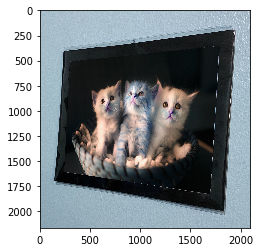

In [5]:
# For image A
coordinates = [
    [298, 511, 0, 0],
    [1774, 357, 1920, 0],
    [1686, 1826, 1920, 1125],
    [238, 1605, 0, 1125]
]
HDA = compute_h(coordinates)
dest_img = cv.imread(frame_images['A']['filename'])
resultD2A = project_image(source_img, dest_img, HDA)
plt.imshow(resultD2A)
cv.imwrite(frame_images['A']['savename'], resultD2A)

True

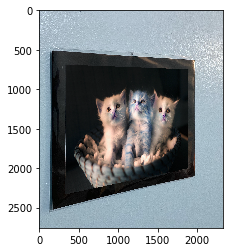

In [6]:
# For image B
coordinates = [
    [342, 690, 0, 0],
    [1888, 750, 1920, 0],
    [1886, 2002, 1920, 1125],
    [334, 2334, 0, 1125]
]
HDB = compute_h(coordinates)
dest_img = cv.imread(frame_images['B']['filename'])
resultD2B = project_image(source_img, dest_img, HDB)
plt.imshow(resultD2B)
cv.imwrite(frame_images['B']['savename'], resultD2B)

True

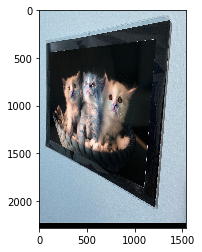

In [7]:
# For image C
coordinates = [
    [106, 444, 0, 0],
    [1224, 306, 1920, 0],
    [1098, 1862, 1920, 1125],
    [120, 1364, 0, 1125]
]
HDC = compute_h(coordinates)
dest_img = cv.imread(frame_images['C']['filename'])
resultD2C = project_image(source_img, dest_img, HDC)
plt.imshow(resultD2C)
cv.imwrite(frame_images['C']['savename'], resultD2C)